In [768]:
import pandas as pd
df=pd.read_csv('COVID_19_Datasets.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [769]:
df.shape

(58, 18)

In [770]:
columns=['Province_State','Country_Region','Last_Update','ISO3']
for col in columns:
    print(df[col].unique())
    print('_________________')

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
_________________
['US']
_________________
['2020-05-21 02:32:54']
_________________
['USA' 'ASM' 'GUM' 'MNP' 'PRI' 'VIR']
_________________


In [724]:
df.ISO3.value_counts()

USA    53
GUM     1
MNP     1
ASM     1
VIR     1
PRI     1
Name: ISO3, dtype: int64

In [725]:
df['ISO3']=df['ISO3'].map({'USA':0,'GUM':1,'MNP':2,'ASM':3,'VIR':4,'PRI':5})

In [726]:
df.drop(columns=['Province_State','Country_Region','Last_Update'],axis=1,inplace=True)

Above I have dropped some columns because either they have contant values or serial value that doesn't contribute to o/p patterns

In [727]:
df.columns

Index(['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [728]:
df.isnull().values.any()

True

There are null values present in dataframe

In [729]:
df.isnull().sum()

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

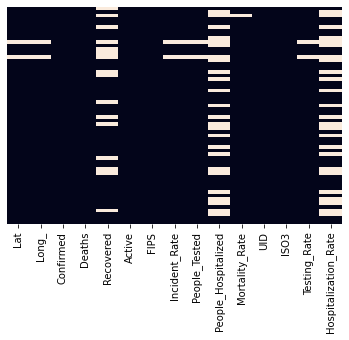

In [730]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

From above heatmap we observe that there are very high no of null values are present in People_Hospitalized,Hospitalization_Rate and Recovered

In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   56 non-null     float64
 1   Long_                 56 non-null     float64
 2   Confirmed             58 non-null     int64  
 3   Deaths                58 non-null     int64  
 4   Recovered             42 non-null     float64
 5   Active                58 non-null     float64
 6   FIPS                  58 non-null     int64  
 7   Incident_Rate         56 non-null     float64
 8   People_Tested         56 non-null     float64
 9   People_Hospitalized   33 non-null     float64
 10  Mortality_Rate        57 non-null     float64
 11  UID                   58 non-null     int64  
 12  ISO3                  58 non-null     int64  
 13  Testing_Rate          56 non-null     float64
 14  Hospitalization_Rate  33 non-null     float64
dtypes: float64(10), int64(5)


observations:
    
    1. we have 58x15 size dataframe.
    2. There are 10 float datatype and 5 int datatype features present after removing 3 object datatype features.
    3. There are total 9 features which have atleast one null value.

In [732]:
cor=df.corr()

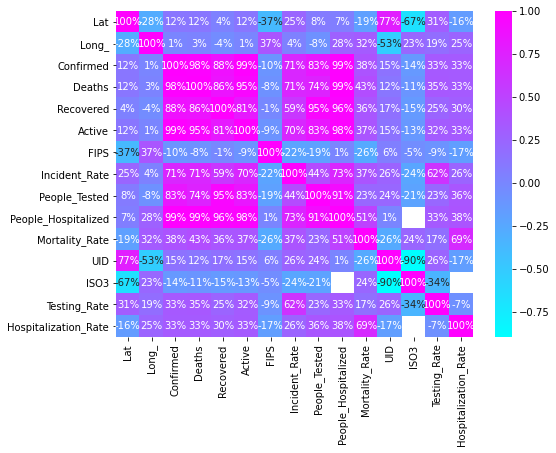

In [733]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Observations:
    
    1. Confirmed,Deaths,Recovered and Active attributes are very positively correlated with each other.
    2. Also People_Tested-People_Hospitalized, UID-Lat columns are very positively correlated.
    3. Here I am not dropping any column because I have already analysed dropping multiple columns which resulted in        Underfitting, so in this project I have employed PCA just before model training.

Let's check correlation with target variable separately

Text(0.5, 1.0, 'correlation with target variable')

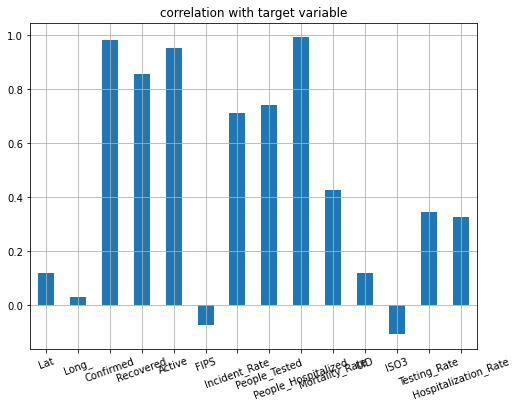

In [734]:
plt.figure(figsize=(8,6))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

From above plot we observe that People_Hospitalized and ISO3 attributes are most positive and most negative correlated with target respectively. 

In [735]:
df.shape

(58, 15)

Plotting Skewness

In [736]:
collist=df.columns.values
ncol=15
nrows=10

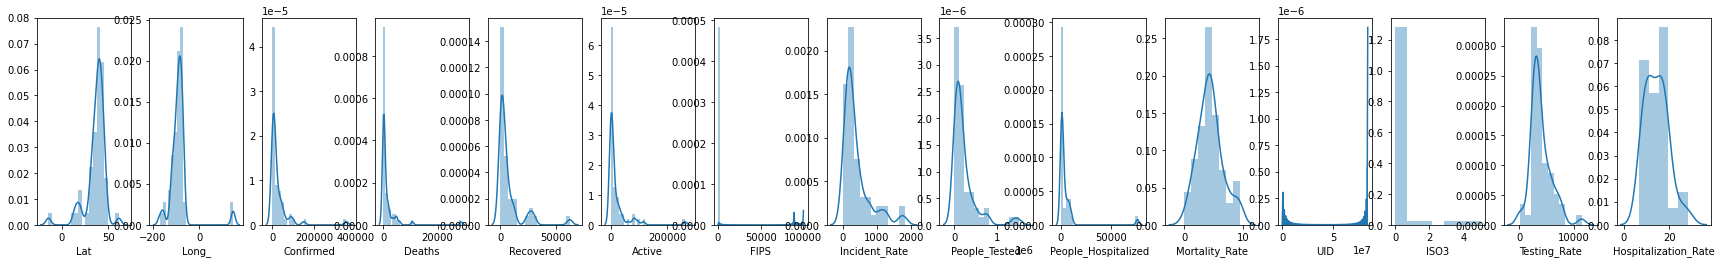

In [737]:
plt.figure(figsize=(2*15,3*15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

Observations:
    
    1. Confirmed,Deaths,Active,Recovered,Incident_Rate,People_Tested columns are right skewed(Positive Skewness).
    2. Lat and Long_ columns have high variance hence high standard deviation.
    3. FPS,ISO3 and UID column values are less continuous and more discrete type.
    4. Mortality_Rate,Testing_Rate and Hospitalizaton_Rate columns have values with comparatively less variance hence they are showing nearby to an uniform distribution 
    

Bi-Variate Analysis

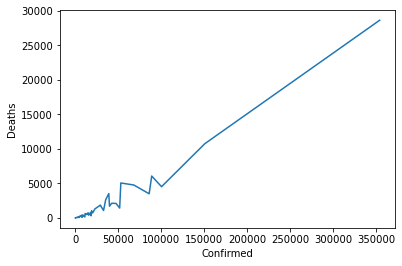

In [738]:
sns.lineplot(x='Confirmed',y='Deaths',data=df)

From above lineplot we observe that initially with some rise in confirmed cases deaths was nearby zero and then in Zig-zag manner upto 50k. Between 50-100 k it observed very abrupt rise then fall, but once the confirmed cases reached upto 100k the correlation became linear.

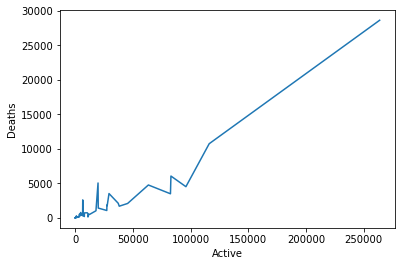

In [739]:
sns.lineplot(x='Active',y='Deaths',data=df)

In Active vs Death plot, we observe that between 0 to 50 k Active cases there were two instances when Deaths increased happazardly then there were high-lows till the Active cases reached 100k, then there is linear relation

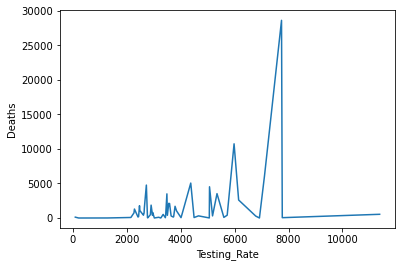

In [771]:
sns.lineplot(x='Testing_Rate',y='Deaths',data=df)

From above plot we observe that the highest rise in Deaths came when Testing Rate reached between 7-8k then with increasing Testing Rate Deaths nos became constant.

<Figure size 576x288 with 0 Axes>

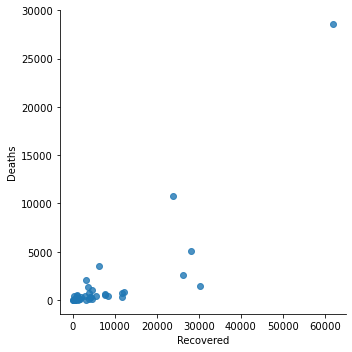

In [806]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Recovered',y='Deaths',fit_reg=False,data=df)
plt.show()

From above plot we observe that Deaths no became minimum at 30 k recoveries then it rose linearly with increase in Recoveries

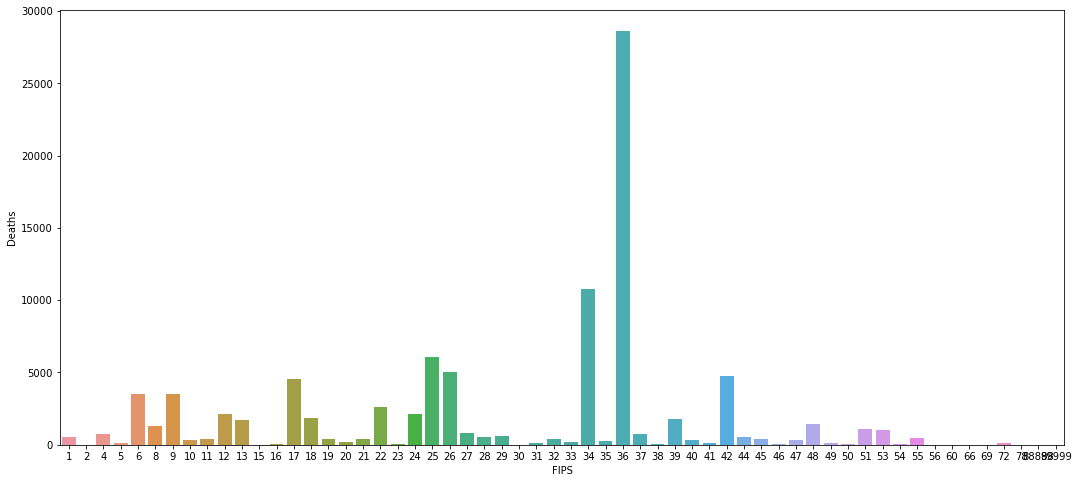

In [815]:
plt.subplots(figsize=(18,8))
sns.barplot(x='FIPS',y='Deaths',data=df)
plt.show()

In above plot FIPS(Federal Information Processing Standards code) is assigned to each state in USA separately.

Observation: Highest no of Deaths are occured in New York (FIPS=36) and New Jersey(FIPS=34), whereas Lowest or No Deaths are occured in FIPS=[2,15,30,56,60,66,69 etc]

Summary Statistics

In [742]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58.000000,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,0.258621,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,0.947024,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,0.000000,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,0.000000,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,0.000000,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


Observations:
    
    1. Minimum Deaths is 0 and Maximum Deaths is 28636.
    2. Minimum Recoveries is 13 and Maximum Recoveries is 61886.
    3. Minimum People_Hospitalized is 65 and Maximum is 76410.
    4. Minimum Mortality_Rate is 0 and Maximum is 9.54.
    5. Minimum Testing_Rate is 97.70 and Maximum is 11377.42.
    
  Also, there is extremely large difference between Q3 and max in most of the columns which shows high variance/out of range values.   

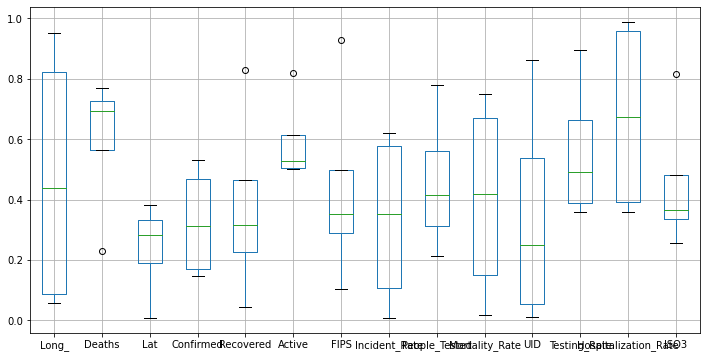

In [744]:
import numpy as np
plt.figure(figsize=(12,6))
df_=pd.DataFrame(data = np.random.random(size=(4,14)), columns = ['Long_','Deaths','Lat','Confirmed','Recovered','Active','FIPS','Incident_Rate','People_Tested','Mortality_Rate','UID','Testing_Rate','Hospitalization_Rate','ISO3'])
df_.boxplot()

From above boxplots we can see the high value outliers are present in columns. For better understanding and visualization I have again plotted boxplots below just before Removing the outliers.

In [745]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows.shape)

(0, 15)


In [746]:
df.shape

(58, 15)

In [747]:
df.isnull().sum()

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Data Preprocessing-Filling null,Outlier removal,Normalization,Standardization and Dimensionality reduction

In [748]:
columns=['Long_','Lat','Incident_Rate','Recovered','People_Tested','Mortality_Rate','People_Hospitalized','Testing_Rate','Hospitalization_Rate']
for col in columns:
    df[col].fillna(df[col].mean(),inplace=True)

Outliers Visualization using box-plots

Lat                        AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Long_                   AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Confirmed               AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Deaths                  AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Recovered               AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Active                  AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
FIPS                    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Incident_Rate           AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
People_Tested                 AxesSubplot(0.125,0.125;0.0824468x0.343182)
People_Hospitalized        AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Mortality_Rate             AxesSubplot(0.322872,0.125;0.0824468x0.343182)
UID                        AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Testing_Rate               AxesSubplot(0.520745,0.125;0.0824468x0.343182)
Hospitalization_Rate       AxesSubplot

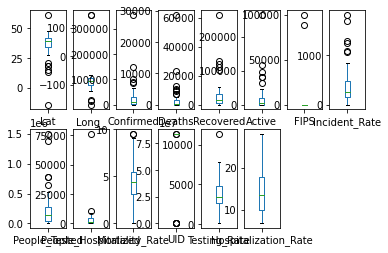

In [805]:
df.plot(kind='box',subplots=True,layout=(2,8))

Outliers Removal using zscore

In [749]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [750]:
df_new.shape

(46, 15)

In [751]:
x=df_new.drop(columns=['Deaths'],axis=1)

In [752]:
y=df_new['Deaths']

In [753]:
x.skew()

Lat                     0.276390
Long_                  -1.452557
Confirmed               1.916809
Recovered               2.386170
Active                  2.432932
FIPS                    0.004318
Incident_Rate           1.705832
People_Tested           1.769735
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            1.281475
Hospitalization_Rate    0.163926
dtype: float64

Normalization

In [754]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x=pd.DataFrame(x)

In [755]:
x.skew()

0     0.105037
1    -0.058006
2    -0.050731
3    -0.032380
4    -0.065029
5    -0.218311
6    -0.002296
7    -0.007664
8    -0.314727
9    -0.019672
10    0.000000
11    0.000000
12    0.098895
13    0.008655
dtype: float64

Dimensionality Reduction

In [756]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)

Standardization

In [757]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

Importing all models,metrices and ensembling techniques

In [758]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

Model Training

In [759]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    rd=Ridge()
    ls=Lasso()
    el=ElasticNet()
    dtr=DecisionTreeRegressor()
    svr=SVR()
    knr=KNeighborsRegressor()
    model=[lr,rd,ls,el,dtr,svr,knr]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state        
            print('max r2 score corresponding to ',m,'for',final_r_state,'is',max_r_score)

max r2 score corresponding to  LinearRegression() for 42 is 0.25377701643909
max r2 score corresponding to  Ridge() for 42 is 0.3049894548723532
max r2 score corresponding to  ElasticNet() for 42 is 0.5830306827130438
max r2 score corresponding to  LinearRegression() for 43 is 0.6439395364494556
max r2 score corresponding to  Lasso() for 43 is 0.6445697740721287
max r2 score corresponding to  DecisionTreeRegressor() for 44 is 0.8431252990863666
max r2 score corresponding to  DecisionTreeRegressor() for 47 is 0.9161176081499239
max r2 score corresponding to  DecisionTreeRegressor() for 60 is 0.9305181483638438
max r2 score corresponding to  DecisionTreeRegressor() for 82 is 0.9731047862158365


In [760]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.20)

In [761]:
print(x_train.shape,'\t',x_test.shape)

(36, 10) 	 (10, 10)


In [762]:
print(y_train.shape,'\t',y_test.shape)

(36,) 	 (10,)


In [763]:
lr=LinearRegression()
rd=Ridge()
ls=Lasso()
el=ElasticNet()
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
model=[lr,rd,ls,el,dtr,svr,knr]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('r2 score is:',r2_score(y_test,y_pred))
    print('mean squared error is:',mean_squared_error(y_test,y_pred))
    print('mean absolute error is:',mean_absolute_error(y_test,y_pred))
    print('root mean squared error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

Score of LinearRegression() is: 0.7778265356049755
r2 score is: 0.5674031674161134
mean squared error is: 897886.6343702279
mean absolute error is: 664.306630043319
root mean squared error is: 947.56880191901


Score of Ridge() is: 0.7772798805982779
r2 score is: 0.5725154757039392
mean squared error is: 887275.6614349863
mean absolute error is: 644.4320358136827
root mean squared error is: 941.9531099980435


Score of Lasso() is: 0.7778216091908466
r2 score is: 0.5684972744356196
mean squared error is: 895615.7345499091
mean absolute error is: 662.1487778517655
root mean squared error is: 946.3697662911201


Score of ElasticNet() is: 0.6949792394722712
r2 score is: 0.530745036988787
mean squared error is: 973973.2879758442
mean absolute error is: 565.620549845343
root mean squared error is: 986.9008501241876


Score of DecisionTreeRegressor() is: 1.0
r2 score is: 0.9613699105542749
mean squared error is: 80179.6
mean absolute error is: 220.4
root mean squared error is: 283.16002542731

Cross Validation of results

In [764]:
model=[lr,rd,ls,el,dtr,svr,knr]
for m in model:
    mscores=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('scores for',m,'are:',mscores)
    print(mscores.mean(),mscores.std())
    print('\n')

scores for LinearRegression() are: [-1.47617903  0.86817881  0.71216873  0.64622624 -3.30756544]
-0.5114341377101487 1.6425465831595558


scores for Ridge() are: [-1.1860238   0.8581788   0.6951497   0.64088891 -3.0616699 ]
-0.4106952563370941 1.5210236444574068


scores for Lasso() are: [-1.44972925  0.86808758  0.71047242  0.64759254 -3.26127663]
-0.49697066787382094 1.6236048860446106


scores for ElasticNet() are: [ 0.18339537  0.66611022  0.46106467  0.53238399 -1.36918546]
0.09475376106428261 0.7487492870821824


scores for DecisionTreeRegressor() are: [-2.53770171  0.94207145  0.688698    0.46929721  0.68681352]
0.049835693709842956 1.3024030271653535


scores for SVR() are: [-0.23052396 -0.43113616 -0.27655844 -0.13706124 -0.03548029]
-0.22215202024307082 0.13326011660052692


scores for KNeighborsRegressor() are: [ 0.42554172  0.61346985  0.36253979  0.45665138 -0.64690231]
0.242260086400665 0.4522011594183636




So from above results we can see that Cross_Val_Score of most of the models is very less, also it is very less for DecisionTreeRegressor() i.e - Overfitting

Lest's try different ensembling techniques to see if we get any good results

In [765]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('r2 score is:',r2_score(y_test,y_pred))
    print('mean squared error is:',mean_squared_error(y_test,y_pred))
    print('mean absolute error is:',mean_absolute_error(y_test,y_pred))
    print('root mean squared error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*****************************************************************************************************************')
    print('\n')

Score of RandomForestRegressor() is: 0.9630338240244013
r2 score is: 0.9208643286904918
mean squared error is: 164251.92284999997
mean absolute error is: 225.609
root mean squared error is: 405.2800548386263
*****************************************************************************************************************


Score of AdaBoostRegressor() is: 0.9942317920324663
r2 score is: 0.976454552436711
mean squared error is: 48870.31312981859
mean absolute error is: 177.05261904761906
root mean squared error is: 221.0663093504268
*****************************************************************************************************************


Score of GradientBoostingRegressor() is: 0.9999996759732931
r2 score is: 0.9329871889448934
mean squared error is: 139090.03220981712
mean absolute error is: 251.6280120089478
root mean squared error is: 372.94776069822046
*****************************************************************************************************************


Score of

From above results we can see that AdaBoostRegressor() is has best score and comparatively better metrices values.

In [766]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=5,scoring='r2')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[-0.80621595  0.9628191   0.74008298  0.61263788  0.66763357]
mean score and standard deviation of RandomForestRegressor() is 0.4353915157092766 0.632132658215665


[-0.58739874  0.92308236  0.93185465  0.55525388  0.65067924]
mean score and standard deviation of AdaBoostRegressor() is 0.4946942749829222 0.5609901275000945


[-0.99987516  0.88938342  0.81561428  0.80013206  0.70822958]
mean score and standard deviation of GradientBoostingRegressor() is 0.4426968362762141 0.7235852212620145


[-0.21795402  0.95066878  0.6553971   0.53220551  0.78467784]
mean score and standard deviation of BaggingRegressor() is 0.5409990414316479 0.40407490447200856


[0.22554748 0.96562616 0.82042304 0.78682843 0.67769725]
mean score and standard deviation of ExtraTreesRegressor() is 0.6952244721283313 0.2522247871966895




From above cross val scores we find that AdaBoostRegressor() and ExtraTreesRegressor() have average mean score and these are not much overfitting.

Visualization of AdaBoostRegressor model and ExtraTreesRegressor model performance by using scatterplot.

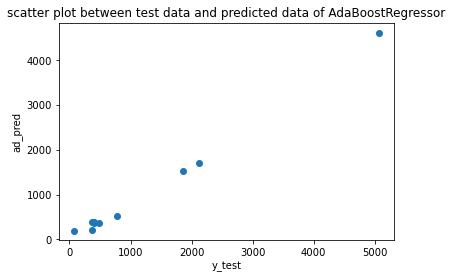

In [808]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
plt.scatter(y_test,ad_pred)
plt.xlabel('y_test')
plt.ylabel('ad_pred')
plt.title('scatter plot between test data and predicted data of AdaBoostRegressor')
plt.show()

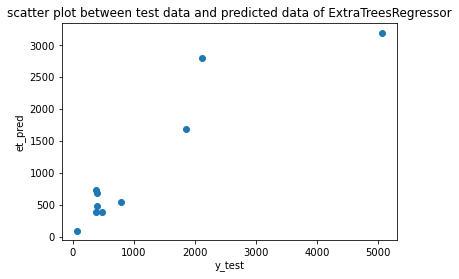

In [811]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred=et.predict(x_test)
plt.scatter(y_test,et_pred)
plt.xlabel('y_test')
plt.ylabel('et_pred')
plt.title('scatter plot between test data and predicted data of ExtraTreesRegressor')
plt.show()

from above plot also we observe that AdaBoostRegressor model has good output prediction performance than ExtraTreesRegressor

Saving AdaBoostRegressor Model.

In [810]:
import pickle
filename='pickladfile.pkl'
pickle.dump(ad,open(filename,'wb'))